# Heart Failure Prediction
![img](http://www.mydr.com.au/wp-content/uploads/2019/04/heart_failure_750.jpeg)

## Introduction

Cardiovascular diseases kill approximately 17 million people globally every year and they mainly exhibit as myocardial infarctions and heart failures. Heart failure (HF) occurs when the heart cannot pump enough blood to meet the needs of the body. In this project, we analyze a dataset containing the medical records of 299 heart failure patients collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab - Pakistan) during the months of April - December in 2015. It consists of 105 women and 194 men with their ages range between 40 and 95 years old. All 299 patients had left ventricular systolic dysfunction and had previous heart failures. This dataset contains 13 features, which reports clinical, body and lifestyle information of a patient namely Age, Anaemia, High Blood Pressure, Creatinine Phosphokinase (CPK), Diabetes, Ejection Fraction, Sex, Platelets, Serum Creatinine, Serum Sodium, Smoking Habit etc.

### About - Project:
This Exploratory Data Analysis project is a part of "Data Analysis with Python: Zero to Pandas" course structured and provided by Jovian. In this project, we'll analyse the relationship between the different features of the heart failure patient included in this dataset namely the distribution of age among the patients, death rate, percentage of male and female patients, variation in the platelets amount, creatinine and sodium level in the blood. The graphical representation and visualisation of data using matplotlib and seaborn library in python helps us to easily understand a lot better about the dataset.

The dataset is obtained from [Kaggle](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data).

Please [click here](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1) to know more about the dataset.

The dataset consist of column names (attributes) which doesn't provide complete information regarding the data recorded, so we have to refer to the another table / websites to see the complete information regarding the attributes (column names) including measurement units and normal level, if required.

#### Discussion of Google play store dataset will involve various steps such as:

1. Loading the data into data frame
2. Cleaning the data
3. Extracting statistics from the dataset
4. Exploratory analysis 
5. Questions that can be asked from the dataset
6. Inferences & Conclusion
7. Reference & Future Work

In [7]:
!pip install jovian --upgrade --quiet

In [8]:
import jovian

In [124]:
# Execute this to save new versions of the notebook
jovian.commit(project="heart-failure-prediction")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/abhineets17/heart-failure-prediction


'https://jovian.ai/abhineets17/heart-failure-prediction'

In [10]:
!pip install opendatasets --upgrade --quiet

In [12]:
import opendatasets as od


download_url = "https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jovianabhi
Your Kaggle Key: ··········


100%|██████████| 3.97k/3.97k [00:00<00:00, 1.87MB/s]

In [13]:
data_filename='./heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv'

In [14]:
import pandas as pd

### Data Preparation and Cleaning

Let's load the CSV files using the Pandas library. We'll use the name "**heart_failure_raw_df**" for the dataframe to indicate.
This is unprocessed data that we might clean, filter and modify to prepare a data frame ready for analysis. So we have to extract a copy of data frame and name it as "**heart_failure_df**". We'll perform data preparation and cleaning operations on "heart_failure_df" and leave the raw data frame untouched and unmodified.

In [15]:
#convert the csv file into pandas data frame 
heart_failure_raw_df = pd.read_csv(data_filename)
#let's extract a copy of raw df to keep the raw df unaffected / untouched 
heart_failure_df = heart_failure_raw_df.copy()
heart_failure_df 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


We can easily identify from the above pandas data frame that the responses have been anonymized to remove personally identifiable information like name, address etc.

In [16]:
#importing numpy module as np 
import numpy as np 

Let's modify our "heart_failure_df" data frame by dropping unnecessary Rows/Columns, renaming the column names, changing the data type of column and so on.

In [17]:
#renaming DEATH_EVENT as patient_dead for my convenience 
heart_failure_df.rename(columns = {'DEATH_EVENT':'patient_dead'}, inplace = True)

In [18]:
#drop the time column which is not necessary for our analysis 
heart_failure_df.drop(['time'],axis=1, inplace =True, errors = 'ignore')

In [19]:
#changing the data type of age column from float to int
heart_failure_df.age = heart_failure_df.age.astype(int)

In [20]:
#changing the data type of following columns to bool type for our convenience 
heart_failure_df[['anaemia','diabetes','high_blood_pressure','smoking',
                  'patient_dead']] = heart_failure_df[['anaemia','diabetes', 
                                                        'high_blood_pressure', 'smoking', 'patient_dead']].astype(bool)

In [21]:
#changing the value of sex column to male or female
heart_failure_df['sex'] = np.where(heart_failure_df['sex'] == 1, 'Male','Female')

In [22]:
#to convert the platelet-count into kilo-platelets/mcL 
heart_failure_df.platelets = (heart_failure_df. platelets/1000).astype(int)
heart_failure_df 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,True
1,55,False,7861,False,38,False,263,1.1,136,Male,False,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,61,True,38,True,155,1.1,143,Male,True,False
295,55,False,1820,False,38,False,270,1.2,139,Female,False,False
296,45,False,2060,True,60,False,742,0.8,138,Female,False,False
297,45,False,2413,False,38,False,140,1.4,140,Male,True,False


In [23]:
#checking for NaN values 
heart_failure_df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
patient_dead                False
dtype: bool

From the above result, it's clear that there's no null values present in dataframe. If there's limited number of columns, we can also check whether a column has null value or not using info() function.

In [24]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    int64  
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    bool   
 11  patient_dead              299 non-null    bool   
dtypes: bool(5), float64(1), int64(5), object(1)
memory usage: 17.9+ KB


**info()** function in pandas module is used to view some basic information of a data frame. From the above output, we can clearly see that there are 299 rows and 12 column and there's no null value. Also we can see the data types of each column in the data frame.

In [25]:
heart_failure_df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.829431,581.839465,38.083612,263.327759,1.39388,136.625418
std,11.894997,970.287881,11.834841,97.805105,1.03451,4.412477
min,40.000000,23.000000,14.000000,25.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212.500000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303.500000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850.000000,9.40000,148.000000


**Describe()** function is used to find some basic statistical information regarding a data frame in pandas. It's normal that, the max age of patient recorded is 95 years and min age is 40 years. All other numeric value records found okay, but the maximum value of Creatinine Phosphokinase (CPK) measured is 7861, that's too high for a normal person. The maximum value of 	creatinine phosphokinase found in a heart failure patient was around 600 micrograms per liter.

In [27]:
heart_failure_df[heart_failure_df.creatinine_phosphokinase > 1000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 297
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       36 non-null     int64  
 1   anaemia                   36 non-null     bool   
 2   creatinine_phosphokinase  36 non-null     int64  
 3   diabetes                  36 non-null     bool   
 4   ejection_fraction         36 non-null     int64  
 5   high_blood_pressure       36 non-null     bool   
 6   platelets                 36 non-null     int64  
 7   serum_creatinine          36 non-null     float64
 8   serum_sodium              36 non-null     int64  
 9   sex                       36 non-null     object 
 10  smoking                   36 non-null     bool   
 11  patient_dead              36 non-null     bool   
dtypes: bool(5), float64(1), int64(5), object(1)
memory usage: 2.4+ KB


The normal value of creatinine phosphokinase (CPK) ranges from 10 to 120 micrograms per liter, but around 36 patients has CPK level more than 1000 micrograms per liter in our observation. Since, we are not sure about the source of error or that the recorded data is correct or not. This error and huge difference in value might be due to the different measurement units. So let's drop that column and not include in our analysis.

In [28]:
#drop creatinine_phosphokinase column
heart_failure_df.drop('creatinine_phosphokinase', inplace = True, axis = 1, errors ='ignore')

Let's check the column names of our data frame using columns() function in pandas.

In [29]:
#to display column names
heart_failure_df.columns 

Index(['age', 'anaemia', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'sex', 'smoking', 'patient_dead'],
      dtype='object')

There are 11 column in our data frame, where each column represents the attribute of the 299 heart failure patients.

Column names (attributes) of the data frame doesn't provide complete information regarding the data recorded, so we have to refer to the another table or any website for reference to see the complete information regarding the attributes (column names) like explanation and measurement units. Also we have to add normal level value for the attributes, for the required column values.

Pandas library in python provides various useful functions to read various file formats, here we'll use read_html function to read a table from the source website. Kindly check the reference links at the bottom of this page.

In [30]:
#to save the html table as pandas data frame 
column_details_df = pd.read_html("https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1 ")[0]

In [31]:
#to drop the unnecessary column
column_details_df.drop('Range', axis =1,inplace = True, errors='ignore' )

In [32]:
#to drop the unnecessary rows
column_details_df.drop([3,4,7,13], axis = 0, inplace =True, errors ='ignore')

In [33]:
#to rename the column names
column_details_df.columns = ['feature', 'explanation', 'measurement_unit']
column_details_df 

,feature,explanation,measurement_unit
0,Age,Age of the patient,Years
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean
2,High blood pressure,If a patient has hypertension,Boolean
5,Diabetes,If the patient has diabetes,Boolean
6,Ejection fraction,Percentage of blood leaving,Percentage
8,Sex,Woman or man,Binary
9,Platelets,Platelets in the blood,kiloplatelets/mL
10,Serum creatinine,Level of creatinine in the blood,mg/dL
11,Serum sodium,Level of sodium in the blood,mEq/L
12,Smoking,If the patient smokes,Boolean


In [34]:
#to rearrange and rename the rows to match the heart_failure_df 
column_details_df = column_details_df.reindex([0,1,5,6,2,9,10,11,8,12,14])
column_details_df.feature = heart_failure_df.columns

In [35]:
#to set the feature column as index for our convenience 
column_details_df.set_index(['feature'], inplace =True)

Let's correct the data in explanation and measurement unit column and another column mentioning the normal value for the attributes.

In [36]:
#to change the details in explanation column 
column_details_df['explanation']['anaemia', 'diabetes', 'ejection_fraction', 
                                 'high_blood_pressure', 'platelets', 'sex', 
                                 'smoking', 'patient_dead'] = ['True, if the patient has Anaemia',
                                                               'True, if the patient has Diabetes', 
                                                                '% of blood leaving the heart at each contraction', 
                                                                'True, if the patient has High blood pressure', 
                                                                'Amount of platelets in the blood', 
                                                                'Male or Female',
                                                                'True, if the patient smokes', 
                                                                'True, if the patient died during the follow-up period'] 

In [37]:
#to change the details in measurement unit column 
column_details_df.measurement_unit['sex', 'platelets','serum_creatinine',
                                   'serum_sodium'] = ['Boolean',
                                                      'kilo-platelets / mcL (microliter)', 
                                                      'mg/dL (milligrams per deciliter)', 
                                                      'mEq/L (milliequivalents per litre)'
                                                         ] 

In [38]:
#let's add another column to mention normal values of the attributes 
column_details_df["normal_value"] = ['None', 
                                     'None', 
                                     'None',
                                     '55% - 70%',
                                     'None', 
                                     '150 - 400 kilo-platelets / mcL', 
                                     '0.6 - 1.2 mg/dL', 
                                     '135 - 145 mEq /L', 
                                     'None', 'None', 'None'
                                    ] 
column_details_df

,explanation,measurement_unit,normal_value
feature,,,
age,Age of the patient,Years,None
anaemia,"True, if the patient has Anaemia",Boolean,None
diabetes,"True, if the patient has Diabetes",Boolean,None
ejection_fraction,% of blood leaving the heart at each contraction,Percentage,55% - 70%
high_blood_pressure,"True, if the patient has High blood pressure",Boolean,None
platelets,Amount of platelets in the blood,kilo-platelets / mcL (microliter),150 - 400 kilo-platelets / mcL
serum_creatinine,Level of creatinine in the blood,mg/dL (milligrams per deciliter),0.6 - 1.2 mg/dL
serum_sodium,Level of sodium in the blood,mEq/L (milliequivalents per litre),135 - 145 mEq /L
sex,Male or Female,Boolean,None


The normal values of the ejection fraction, creatinine level, sodium level and platelets count was taken from various resources, please check the reference links at the bottom. And these values varies based on patients age, body and gender etc.,but we took the most suitable approximate value to simplify our analysis. Please be aware that there might be small changes in our analysis when compared to the real world.

### Datasets - Cleaned & Prepared
Now, our both the datasets heart_failure_df and column_details_df are ready for our analysis. Let's check some basic information regarding our cleaned datasets before proceeding for visualisation methods.

In [39]:
column_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, age to patient_dead
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   explanation       11 non-null     object
 1   measurement_unit  11 non-null     object
 2   normal_value      11 non-null     object
dtypes: object(3)
memory usage: 652.0+ bytes


There are 11 rows in our column_details_df which clearly describes the informations (like explanation, measurement units and normal value) regarding the 11 attributes in the heart_failure_df data frame.

In [40]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    int64  
 1   anaemia              299 non-null    bool   
 2   diabetes             299 non-null    bool   
 3   ejection_fraction    299 non-null    int64  
 4   high_blood_pressure  299 non-null    bool   
 5   platelets            299 non-null    int64  
 6   serum_creatinine     299 non-null    float64
 7   serum_sodium         299 non-null    int64  
 8   sex                  299 non-null    object 
 9   smoking              299 non-null    bool   
 10  patient_dead         299 non-null    bool   
dtypes: bool(5), float64(1), int64(4), object(1)
memory usage: 15.6+ KB


There are 299 rows and 11 columns in our heart_failure_df with no null values. In raw dataset, there were 299 rows and 13 columns, we performed some operations to remove the unnecessary columns.

In [41]:
heart_failure_df.describe()

,age,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.829431,38.083612,263.327759,1.39388,136.625418
std,11.894997,11.834841,97.805105,1.03451,4.412477
min,40.000000,14.000000,25.000000,0.50000,113.000000
25%,51.000000,30.000000,212.500000,0.90000,134.000000
50%,60.000000,38.000000,262.000000,1.10000,137.000000
75%,70.000000,45.000000,303.500000,1.40000,140.000000
max,95.000000,80.000000,850.000000,9.40000,148.000000


From the above result, we can find the average age of patients, maximum and minimum value of clinical records stored in our data frame.

#### Number of Male and Female patients

In [42]:
heart_failure_df.sex.value_counts()

Male      194
Female    105
Name: sex, dtype: int64

#### Number of Patients with Anaemia

In [43]:
heart_failure_df.anaemia.value_counts()

False    170
True     129
Name: anaemia, dtype: int64

#### Number of Patients with Diabetes

In [44]:
heart_failure_df.diabetes.value_counts()

False    174
True     125
Name: diabetes, dtype: int64

#### Number of Patients with High Blood Pressure

In [45]:
heart_failure_df.high_blood_pressure.value_counts()

False    194
True     105
Name: high_blood_pressure, dtype: int64

#### Number of Patients with Smoking Habit

In [46]:
heart_failure_df.smoking.value_counts()

False    203
True      96
Name: smoking, dtype: int64

#### Number of Patients died during follow-up period

In [47]:
heart_failure_df.groupby(['patient_dead', 'sex']).size().reset_index().pivot(columns= 'patient_dead',index = 'sex', values=0) 

patient_dead,False,True
sex,,
Female,71,34
Male,132,62


#### Number of Patients with Abnormal Ejection Fraction

In [48]:
#find the normal value of Ejection Fraction 
column_details_df.normal_value['ejection_fraction']

'55% - 70%'

In [49]:
# Abnormal Ejection Fraction(abn_ef)
abn_ef = heart_failure_df[(heart_failure_df.ejection_fraction < 55) | (heart_failure_df.ejection_fraction >70)]
abn_ef

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,False,20,True,265,1.9,130,Male,False,True
1,55,False,False,38,False,263,1.1,136,Male,False,True
2,65,False,False,20,False,162,1.3,129,Male,True,True
3,50,True,False,20,False,210,1.9,137,Male,False,True
4,65,True,True,20,False,327,2.7,116,Female,False,True
...,...,...,...,...,...,...,...,...,...,...,...
293,63,True,True,35,False,179,0.9,136,Male,True,False
294,62,False,True,38,True,155,1.1,143,Male,True,False
295,55,False,False,38,False,270,1.2,139,Female,False,False
297,45,False,False,38,False,140,1.4,140,Male,True,False


The normal value of Ejection Fraction ranges from 55% to 70%. Here, we found that there are 261 patients with abnormal Ejection Fraction.

#### Number of Patients with Abnormal Platelets Count

In [50]:
#find the normal value of Platelets Count 
column_details_df.normal_value['platelets']

'150 - 400 kilo-platelets / mcL'

In [51]:
#Abnormal Platelets Count(abn_platelets)
abn_platelets = heart_failure_df[(heart_failure_df.platelets < 150) | (heart_failure_df.platelets >400)]
abn_platelets

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
6,75,True,False,15,False,127,1.20,137,Male,False,True
7,60,True,True,60,False,454,1.10,131,Male,True,True
12,45,True,False,30,False,136,1.10,137,Male,False,True
14,49,True,False,30,True,427,1.00,138,Female,False,False
15,82,True,False,50,False,47,1.30,136,Male,False,True
19,48,True,True,55,False,87,1.90,121,Female,False,True
25,80,False,True,38,False,149,1.90,144,Male,True,True
47,60,False,True,38,True,451,0.60,138,Male,True,True
48,80,True,False,20,True,140,4.40,133,Male,False,True
51,53,True,False,20,True,418,1.40,139,Female,False,True


The normal value of Platelets Count ranges from 150 - 400 kilo-platelets / mcL. Here, we found that there are 47 patients with abnormal Platelets Count

#### Number of Patients with Abnormal Creatinine level in the blood

In [52]:
#find the normal value of Creatinine level in the blood 
column_details_df.normal_value['serum_creatinine']

'0.6 - 1.2 mg/dL'

In [53]:
#Abnormal Creatinine level in the blood(abn_creatinine)
abn_creatinine = heart_failure_df[(heart_failure_df.serum_creatinine < 0.6) | (heart_failure_df.serum_creatinine >1.2)]
abn_creatinine

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,False,20,True,265,1.9,130,Male,False,True
2,65,False,False,20,False,162,1.3,129,Male,True,True
3,50,True,False,20,False,210,1.9,137,Male,False,True
4,65,True,True,20,False,327,2.7,116,Female,False,True
5,90,True,False,40,True,204,2.1,132,Male,True,True
...,...,...,...,...,...,...,...,...,...,...,...
282,42,False,False,30,False,215,3.8,128,Male,True,False
286,60,False,False,35,False,279,1.7,140,Male,False,False
291,60,False,False,35,False,133,1.4,139,Male,False,False
297,45,False,False,38,False,140,1.4,140,Male,True,False


The normal value of Platelets Count ranges from 0.6 - 1.2 mg/dL. Here, we found that there are 102 patients with abnormal Creatinine level in the blood.

#### Number of Patients with Abnormal Sodium level in the blood

In [54]:
#find the normal value of Sodium level in the blood 
column_details_df.normal_value['serum_sodium']

'135 - 145 mEq /L'

In [55]:
#Abnormal Sodium level in the blood(abn_sodium)
abn_sodium = heart_failure_df[(heart_failure_df.serum_sodium < 135) | (heart_failure_df.serum_sodium >145)]
abn_sodium 

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,False,20,True,265,1.9,130,Male,False,True
2,65,False,False,20,False,162,1.3,129,Male,True,True
4,65,True,True,20,False,327,2.7,116,Female,False,True
5,90,True,False,40,True,204,2.1,132,Male,True,True
7,60,True,True,60,False,454,1.1,131,Male,True,True
...,...,...,...,...,...,...,...,...,...,...,...
270,44,False,True,30,True,263,1.6,130,Male,True,False
271,51,False,True,40,False,221,0.9,134,Female,False,False
272,67,False,False,38,False,215,1.2,133,Female,False,False
282,42,False,False,30,False,215,3.8,128,Male,True,False


The normal value of Sodium level in the blood ranges from 135 - 145 mEq/L. Here, we found that there are 85 patients with abnormal Sodium level in the blood.

### Sample Data

We've now cleaned up and prepared the dataset for our analysis. Let's take a look at a sample of rows from the data frame.

In [56]:
heart_failure_df.sample(5)

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
280,70,False,True,40,False,241,1.0,137,Male,False,False
275,45,False,False,38,True,422,0.8,137,Female,False,False
245,61,True,True,38,False,282,1.4,137,Male,False,False
211,50,False,False,62,True,147,0.8,140,Male,True,False
288,65,False,True,35,False,263,1.1,142,Female,False,False


## Exploratory Data Analysis & Visualization

Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.

Let's install and import "seaborn" library as "sns" and "matplotlib.pyplot" module as "plt" to perform some visualization operations on our data frame to understand the distribution and relationships of attributes.

In [57]:
!pip install matplotlib seaborn --upgrade --quiet 

     |████████████████████████████████| 11.2 MB 7.5 MB/s 
     |████████████████████████████████| 285 kB 54.4 MB/s 
     |████████████████████████████████| 959 kB 70.2 MB/s 


In [58]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [59]:
#set some default style for our graphs
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = 'white'

### Age

Let's have a look at the distribution of age of the heart failure patients recorded in our dataset by using "hist" function from "matplotlib.pyplot" which is used to create histograms.

"A histogram represents the distribution of a variable by creating bins (interval) along the range of values and showing vertical bars to indicate the number of observations in each bin".

In [63]:

!pip install matplotlib==3.1.3 --quiet

ImportError: cannot import name '_png' from 'matplotlib' (/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py) site:stackoverflow.com
not work thas by we install matplotlib==3.1.3 and its work.

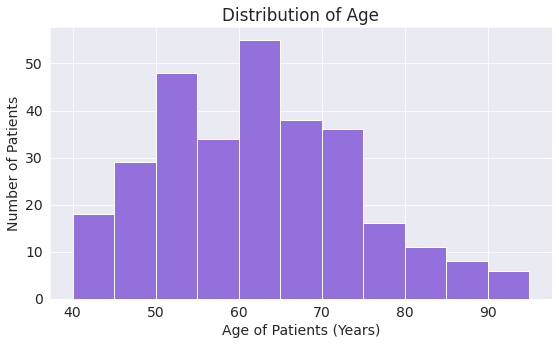

In [64]:
plt.hist(heart_failure_df.age, bins=np.arange(40,100, 5), color ='mediumpurple')
plt.xlabel("Age of Patients (Years)")
plt.ylabel("Number of Patients")
plt.title("Distribution of Age");

From the above histogram, it's clear that most of the patients falls under 60-65 age group and the next place goes to 50-55 age group.

The life expectancy of a person in Pakistan in 2015 was approximately 67 years. It's obvious that the number of patients recorded starts declining from 65-70 age group. You can see the complete list of life expectancy of people in Pakistan (1950 - 2021) using the link given in the reference section.

### Gender


In [65]:
#to store the gender counts into a variable
gender_counts = heart_failure_df.sex.value_counts()

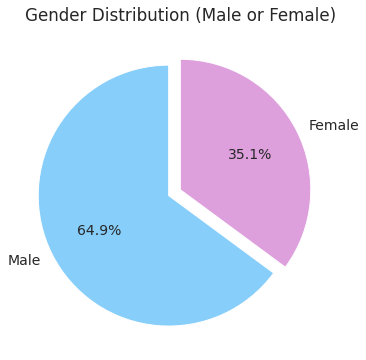

In [66]:
plt.figure(figsize=(12, 6))
plt.pie(gender_counts, labels = gender_counts.index, autopct ='%.1f%%', 
        startangle = 90, explode = [0.1, 0], colors = ['lightskyblue', 'plum'])
plt.title("Gender Distribution (Male or Female)");

As we can clearly see, only 35.1% of the heart failure patients were female in our observation. This means that we have more number of male patients when compared to females in the dataset. So, we can easily say that this dataset is slightly imbalanced.

### Death

Let's check the relationship between death of the patients and their age group and gender.

#### Death Rate

An important factor to look at is the percentage of patients died during the follow-up period. Let's use pie chart to visualize.

In [67]:
#count number of patients dead
dead_counts = heart_failure_df.patient_dead.value_counts()
dead_counts 

False    203
True      96
Name: patient_dead, dtype: int64

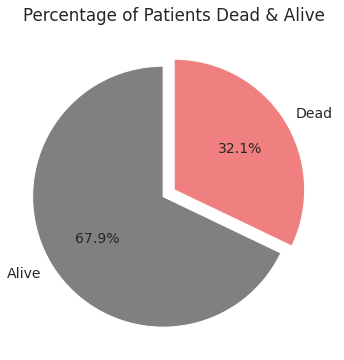

In [70]:
plt.figure(figsize=(12, 6))
plt.pie(dead_counts, labels = ['Alive', 'Dead'] , autopct ='%.1f%%', 
        startangle = 90, explode=[0.1, 0], colors =['#808080', 'lightcoral'])
plt.title("Percentage of Patients Dead & Alive");

As we can clearly see that, the percentage of patients died during the follow-up period is 32.1%. This might be because the data mentioned in our data frame corresponds to only the certain period of time (April'15 - December'15) and more number of patients might have died after this period which isn't recorded.

#### Death and Age Group

Let's define a helper function to create another column in our actual data frame which describes the age group of the heart failure patients. Since, the age of patients ranges from 40 to 95 years. Let's group them into a category like '40-45', '45-50', '50-55', '55-60' and so on. Age groups of the patient helps us to easily understand and visualize relationship of various attributes with age.

In [72]:
def create_range_series(number_series):
    """Creates a series with range(group) for the numeric values 
    provided in another series which is passed as an argument.
    This function takes only one argument which is (Pandas) series object, 
    returns another (Pandas) series object. 
    
    Argument:
        number_series - A column in pandas data frame with numeric values. 
    """
    condition = [
    (number_series >= 0) & (number_series < 5), 
    (number_series >= 5) & (number_series < 10), 
    (number_series >= 10) & (number_series < 15), 
    (number_series >= 15) & (number_series < 20), 
    (number_series >= 20) & (number_series < 25), 
    (number_series >= 25) & (number_series < 30), 
    (number_series >= 30) & (number_series < 35), 
    (number_series >= 35) & (number_series < 40), 
    (number_series >= 40) & (number_series < 45), 
    (number_series >= 45) & (number_series < 50), 
    (number_series >= 50) & (number_series < 55), 
    (number_series >= 55) & (number_series < 60), 
    (number_series >= 60) & (number_series < 65), 
    (number_series >= 65) & (number_series < 70), 
    (number_series >= 70) & (number_series < 75), 
    (number_series >= 75) & (number_series < 80), 
    (number_series >= 80) & (number_series < 85), 
    (number_series >= 85) & (number_series < 90), 
    (number_series >= 90) & (number_series < 95), 
    (number_series >= 95) & (number_series < 100)
    ]
    
    output = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', 
              '35-40', '40-45', '45-50', '50-55', '55-60','60-65','65-70', 
              '70-75','75-80','80-85', '85-90', '90-95', '95-100'
              ] 
    result = np.select(condition, output, '>100')
    return pd.Series(result)

In [73]:
#to create a column with age group 
heart_failure_df['age_group'] = create_range_series(heart_failure_df.age)
heart_failure_df

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead,age_group
0,75,False,False,20,True,265,1.9,130,Male,False,True,75-80
1,55,False,False,38,False,263,1.1,136,Male,False,True,55-60
2,65,False,False,20,False,162,1.3,129,Male,True,True,65-70
3,50,True,False,20,False,210,1.9,137,Male,False,True,50-55
4,65,True,True,20,False,327,2.7,116,Female,False,True,65-70
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,True,38,True,155,1.1,143,Male,True,False,60-65
295,55,False,False,38,False,270,1.2,139,Female,False,False,55-60
296,45,False,True,60,False,742,0.8,138,Female,False,False,45-50
297,45,False,False,38,False,140,1.4,140,Male,True,False,45-50


Now that we have created another column in our 'heart_failure_df' data frame for the age groups using our helper function 'create_range_series', let's find the number of patients dead corresponding to the particular age group.

In [74]:
dead_patients = heart_failure_df[heart_failure_df.patient_dead == True].groupby('age_group').count()
alive_patients = heart_failure_df[heart_failure_df.patient_dead == False].groupby('age_group').count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  This is separate from the ipykernel package so we can avoid doing imports until


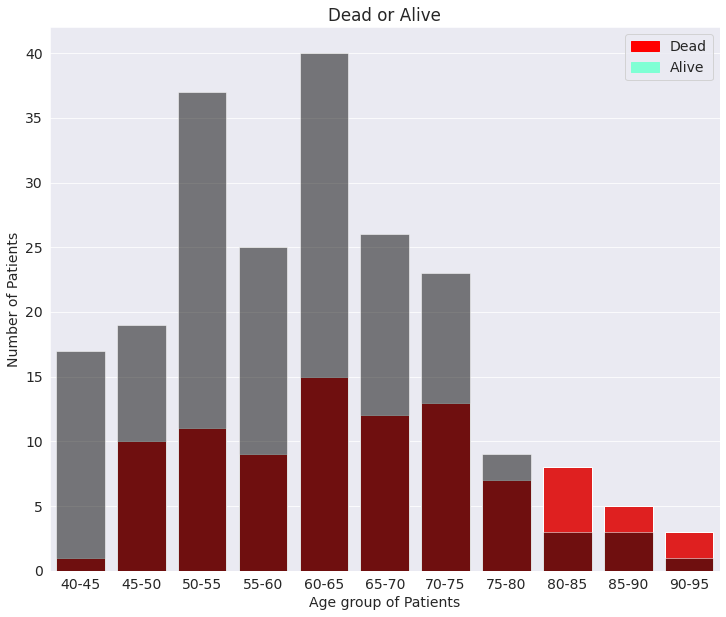

In [76]:
plt.figure(figsize=(12,10))
sns.barplot(x = dead_patients.index , y = dead_patients.patient_dead, alpha=1, palette =['red'])
sns.barplot(x = alive_patients.index, y = alive_patients.patient_dead, alpha = 0.5, palette = ['#000000'], estimator=sum, ci=None, )
plt.title('Dead or Alive')
plt.xlabel('Age group of Patients')
dead = mpatches.Patch(color= 'red', label='Dead')
alive = mpatches.Patch(color='aquamarine', label='Alive')
plt.legend(handles=[dead, alive])
plt.ylabel('Number of Patients');

As we can clearly see, that there are more number of patients died (during the follow-up period is) in 60-65 age group (i.e 15 Patients). It's obvious, since we have more number of patients in 60-65 age group. And the proportion of patients died starts increasing from 65-70 age group and the number of patients died is more than alive patients in the age group of '80-85', '85-90' and '90-95'. This is because over the time, the body’s immune system naturally becomes less capable of handling new threats, such as viruses including novel corona virus. This increases the risk of having issues with various illnesses which ultimately leads to their end.

#### Death and Gender

We already have a look at the relationship between the different age groups and death rate. Now let's have a look at how the death rate varies with respect to patients gender. Let's use 'countplot' function from seaborn library to visualize.

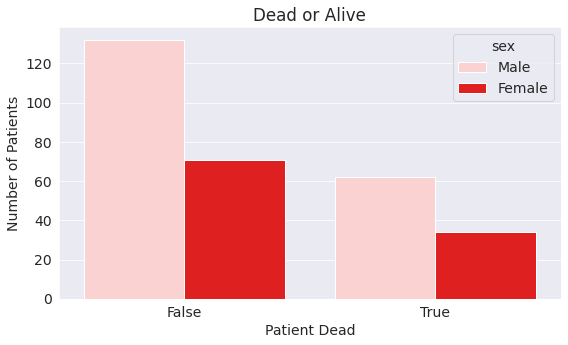

In [77]:
sns.countplot(x = heart_failure_df.patient_dead, hue = heart_failure_df.sex, palette =['#FFCCCB', '#FF0000'])
plt.title('Dead or Alive')
plt.xlabel('Patient Dead')
plt.ylabel('Number of Patients');

We can conclude from the above output, though we have more number of male patients, the proportion of male and female patients died during the follow-up period is almost equal.

### Diseases

We have to analyze the number of patients having anaemia, diabetes, high blood pressure, smoking habit, abnormal ejection fraction, abnormal creatinine and sodium level.

So, let's create another column in our data frame to indicate the abnormalities of the various records.

Let's use 'subplot' function from 'matplotlib.pyplot' to display 8 plots in a single output.

In [78]:
#create columns to indicate abnormalities 
heart_failure_df['abnormal_ef'] = np.where(((heart_failure_df.ejection_fraction >= 55) &
                                            (heart_failure_df.ejection_fraction <=70)) , 'Normal', 'Abormal')
heart_failure_df['abnormal_platelets'] = np.where(((heart_failure_df.platelets >= 150) & 
                                                   (heart_failure_df.platelets <= 400)) , 'Normal', 'Abnormal')
heart_failure_df['abnormal_creatinine'] = np.where(((heart_failure_df.serum_creatinine >= 0.6) & 
                                                    (heart_failure_df.serum_creatinine <= 1.2)), 'Normal','Abnormal')
heart_failure_df['abnormal_sodium'] = np.where(((heart_failure_df.serum_sodium >= 135) & 
                                                (heart_failure_df.serum_sodium <= 145)) , 'Normal', 'Abnormal') 

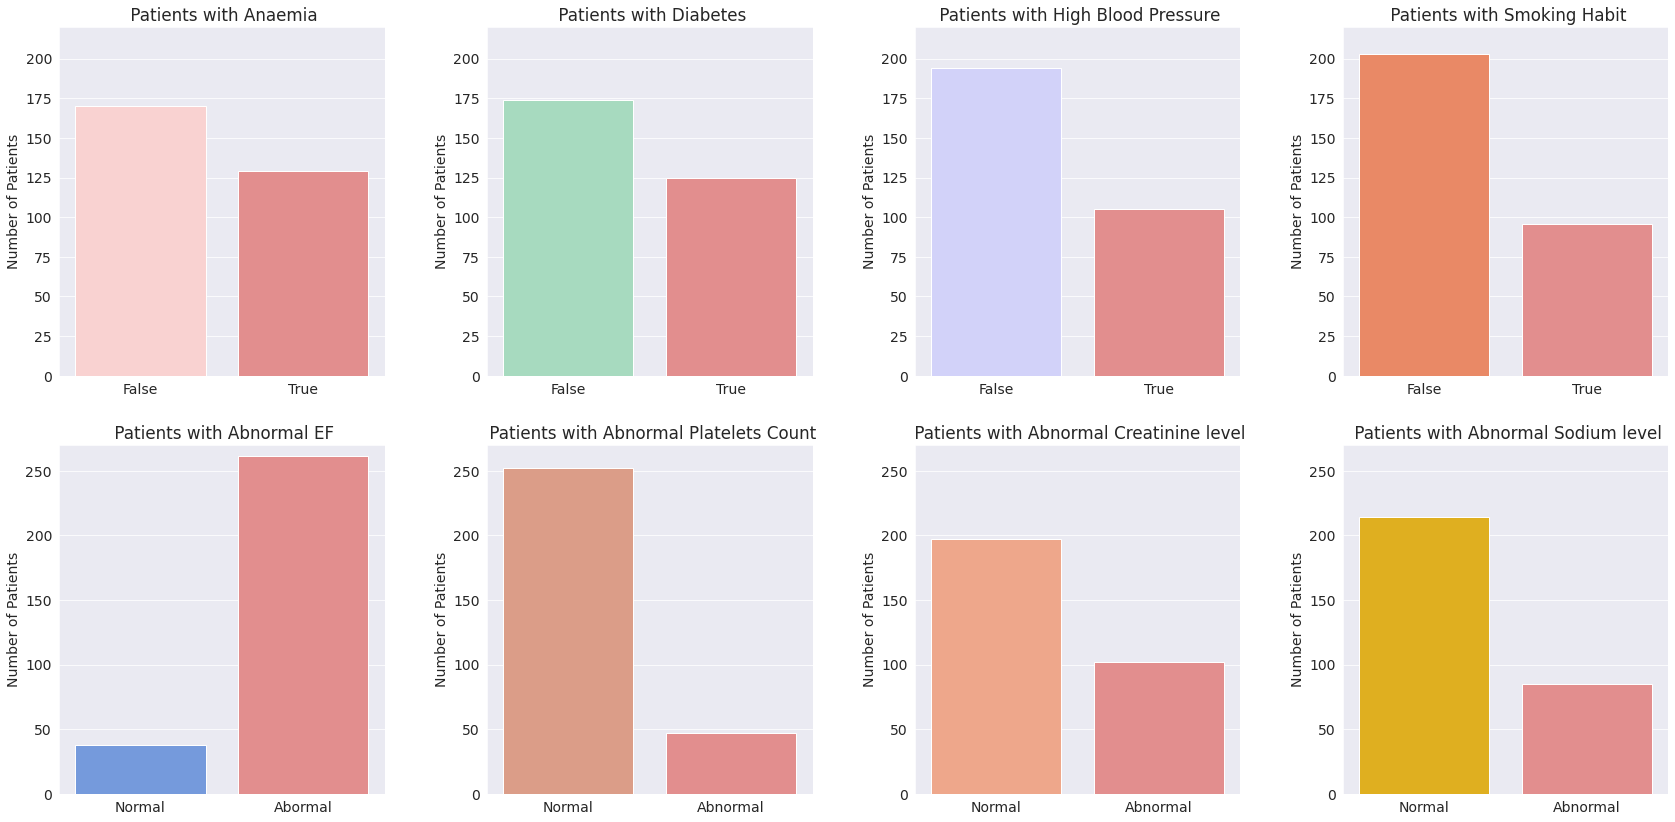

In [83]:
fig, axis = plt.subplots(2,4, figsize =(24, 12)) 
#axis(0,0) use this axis for Anaemia 
axis[0,0].set_title(" Patients with Anaemia")
sns.countplot(x = heart_failure_df.anaemia, ax=axis[0,0], palette=['#FFCCCB', 'lightcoral'] )
axis[0,0].set_xlabel("")
axis[0,0].set_ylabel("Number of Patients")
axis[0,0].set_ylim([0, 220])

#axis(0,1) use this axis for Diabetes 
axis[0,1].set_title(" Patients with Diabetes")
sns.countplot(x = heart_failure_df.diabetes, ax=axis[0,1], palette=['#9FE2BF', 'lightcoral'])
axis[0,1].set_xlabel("")
axis[0,1].set_ylabel("Number of Patients")
axis[0,1].set_ylim([0, 220])


#axis(0,2) use this axis for High blood pressure 
axis[0,2].set_title(" Patients with High Blood Pressure")
sns.countplot(x = heart_failure_df.high_blood_pressure, ax=axis[0,2], palette=['#CCCCFF', 'lightcoral'])
axis[0,2].set_xlabel("")
axis[0,2].set_ylabel("Number of Patients")
axis[0,2].set_ylim([0, 220])

#axis(0,3) use this axis for smoking habit 
axis[0,3].set_title(" Patients with Smoking Habit")
sns.countplot(x = heart_failure_df.smoking, ax=axis[0,3], palette=['#FF7F50', 'lightcoral'])
axis[0,3].set_xlabel("")
axis[0,3].set_ylabel("Number of Patients")
axis[0,3].set_ylim([0, 220])


#axis(1,0) use this axis for Ejection Fraction 
axis[1,0].set_title(" Patients with Abnormal EF")
sns.countplot(x = heart_failure_df.abnormal_ef.sort_values(ascending =False) , ax=axis[1,0], palette=['#6495ED', 'lightcoral'])
axis[1,0].set_xlabel("")
axis[1,0].set_ylabel("Number of Patients")
axis[1,0].set_ylim([0, 270])

#axis(1,1) use this axis for Platelets count 
axis[1,1].set_title(" Patients with Abnormal Platelets Count")
sns.countplot(x = heart_failure_df.abnormal_platelets.sort_values(ascending =False) , ax=axis[1,1], palette=['#E9967A', 'lightcoral'])
axis[1,1].set_xlabel("")
axis[1,1].set_ylabel("Number of Patients")
axis[1,1].set_ylim([0, 270])

#axis(1,2) use this axis for Creatinine level 
axis[1,2].set_title(" Patients with Abnormal Creatinine level")
sns.countplot(x = heart_failure_df.abnormal_creatinine.sort_values(ascending =False), ax=axis[1,2], palette=['#FFA07A', 'lightcoral'])
axis[1,2].set_xlabel("")
axis[1,2].set_ylabel("Number of Patients")
axis[1,2].set_ylim([0, 270])

#axis(1,3) use this axis for sodium level
axis[1,3].set_title(" Patients with Abnormal Sodium level")
sns.countplot(x = heart_failure_df.abnormal_sodium.sort_values(ascending =False), ax=axis[1,3], palette=['#FFBF00', 'lightcoral'])
axis[1,3].set_xlabel("")
axis[1,3].set_ylabel("Number of Patients")
axis[1,3].set_ylim([0, 270])

#to provide spacing between adjacent plots
plt.tight_layout(pad=2);

As we can clearly identify, that abnormality in Ejection Fraction(EF) is the most common factor among the heart failure patients.

"EF refers to the amount of blood being pumped out of the left ventricle each time it contracts. The left ventricle is the heart's main pumping chamber. Heart failure (HF) occurs when the heart cannot pump enough blood to meet the needs of the body".

Low EF is one of the primary reasons which causes heart failure, that's the reason we have more number of patients with abnormal Ejection Fraction.

Abnormal Ejection Fraction is followed by the abnormal creatinine and sodium level respectively, the factor which is least common among the heart failure patients is abnormal Platelets Count (i.e only 47 Patients).

Number of Patients with Anaemia, Diabetes and High Blood Pressure are almost equal and ranges from 100 - 120 Patients.

#### Pair wise relationship

A pair plot gives pairwise relationships in a dataset. Let’s say that we have 5 variables in a dataset. When we implement pair plot with this data, it will create plots between those 5 variables. Say for example, the first variable will be taken as the x-axis value and other variables will be taken as y-axis value individually. As a result, you will have 5 plots for 1st variable alone. This will be repeated for the other variables as well.

The idea behind pair plot is to understand the relationship between the variables present in the data.

Let's separate numeric columns from the dataset to apply 'pairplot' function to understand the relationship between the different attributes.

In [84]:
#filter columns with numeric value
numeric_column = heart_failure_df[['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']]

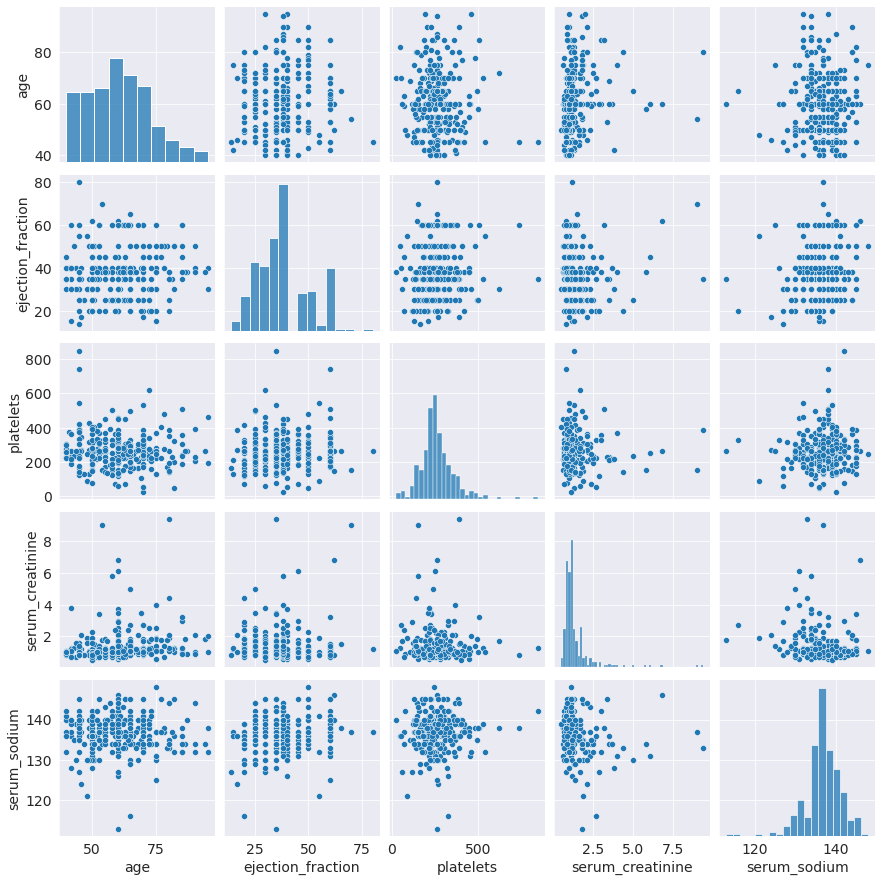

In [85]:
sns.pairplot(numeric_column);

By using 'pairplot' function, we can easily understand and visualize the relationship between the different variables. For example, from the above output we found that only a few patients has normal creatinine and sodium level.

#### Attributes - Distribution

Let's build distribution plot for all columns with numeric values.

Distribution plot helps us to find whether the variables are normally distributed or skewed.

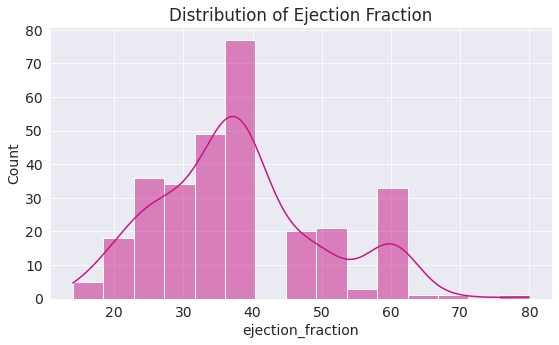

In [86]:
plt.title("Distribution of Ejection Fraction")
sns.histplot(heart_failure_df.ejection_fraction, kde = True, color ='#C71585');

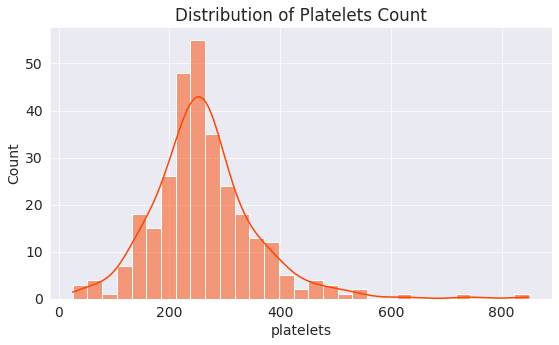

In [87]:
plt.title("Distribution of Platelets Count") 
sns.histplot(heart_failure_df.platelets, kde = True, color ='#FF4500');

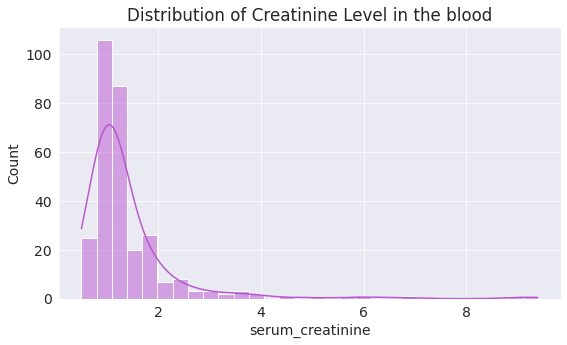

In [91]:
plt.title("Distribution of Creatinine Level in the blood") 
sns.histplot(heart_failure_df.serum_creatinine, kde = True, bins = 30, color ='#BA55D3');

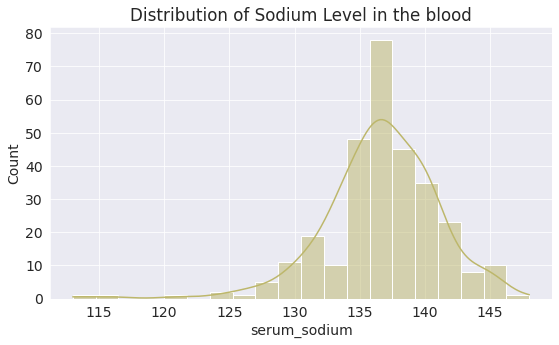

In [92]:
plt.title("Distribution of Sodium Level in the blood") 
sns.histplot(heart_failure_df.serum_sodium, kde = True, color ='#BDB76B');

Now that we have plotted distribution plot for platelets count, creatinine level, sodium level and ejection fraction and it's obvious that no values are normally distributed. Platelets count, Ejection Fraction and Creatinine Level are right skewed and Sodium Level is left skewed. If the skewness in the data is more, we may have to perform some modifications, in order to get better results from the Machine Learning models once we train them.

## Question & Answer

We've already gained several insights about the heart failure patients and their clinical records by exploring individual columns of the dataset. Let's ask some specific questions and we'll try to answer them using data frame operations and visualization.

### Ques: How many number of patients are there in our observation? out of them how many male and female patients are there?

In [93]:
heart_failure_df.shape

(299, 16)

In [94]:
print("Total number of patients in our observation is {}.".format(heart_failure_df.shape[0]))

Total number of patients in our observation is 299.


In [95]:
heart_failure_df.sex.value_counts()

Male      194
Female    105
Name: sex, dtype: int64

In [96]:
print("Number of Male patients in our observation is {}.".format(heart_failure_df.sex.value_counts()[0]))
print("Number of Female patients in our observation is {}.".format(heart_failure_df.sex.value_counts()[1]))

Number of Male patients in our observation is 194.
Number of Female patients in our observation is 105.


### Ques: What is the normal level of Ejection Fraction? How many patients had abnormal Ejection Fraction?

In [97]:
column_details_df.normal_value['ejection_fraction']

'55% - 70%'

In [98]:
print("The normal level of Ejection Fraction is {}.".format(column_details_df.normal_value['ejection_fraction']))

The normal level of Ejection Fraction is 55% - 70%.


In [99]:
heart_failure_df[(heart_failure_df.ejection_fraction >= 55) & (heart_failure_df.ejection_fraction <= 70)].shape

(38, 16)

In [101]:
print("Number of Patients with Normal Ejection Fraction rate is {}".format(heart_failure_df[(heart_failure_df.ejection_fraction >= 55) &
                                                                                             (heart_failure_df.ejection_fraction <= 70)].shape[0]))

Number of Patients with Normal Ejection Fraction rate is 38


### Ques: How many patients had smoking habit? out of them how many male and female patients are there?

In [102]:
heart_failure_df[heart_failure_df.smoking == True]

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead,age_group,abnormal_ef,abnormal_platelets,abnormal_creatinine,abnormal_sodium
2,65,False,False,20,False,162,1.3,129,Male,True,True,65-70,Abormal,Normal,Abnormal,Abnormal
5,90,True,False,40,True,204,2.1,132,Male,True,True,90-95,Abormal,Normal,Abnormal,Abnormal
7,60,True,True,60,False,454,1.1,131,Male,True,True,60-65,Normal,Abnormal,Normal,Abnormal
9,80,True,False,35,True,388,9.4,133,Male,True,True,80-85,Abormal,Normal,Abnormal,Abnormal
10,75,True,False,38,True,368,4.0,131,Male,True,True,75-80,Abormal,Normal,Abnormal,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,52,False,True,38,False,382,1.0,140,Male,True,False,50-55,Abormal,Normal,Normal,Normal
293,63,True,True,35,False,179,0.9,136,Male,True,False,60-65,Abormal,Normal,Normal,Normal
294,62,False,True,38,True,155,1.1,143,Male,True,False,60-65,Abormal,Normal,Normal,Normal
297,45,False,False,38,False,140,1.4,140,Male,True,False,45-50,Abormal,Abnormal,Abnormal,Normal


In [103]:
print("Number of Patients with Smoking Habit is {}.".format(heart_failure_df[heart_failure_df.smoking == True].shape[0]))

Number of Patients with Smoking Habit is 96.


In [104]:
smokers = heart_failure_df[heart_failure_df.smoking == True].groupby('sex').count()
smokers = smokers['smoking']
smokers

sex
Female     4
Male      92
Name: smoking, dtype: int64

In [105]:
print("Number of Male Patients with Smoking Habit is {}.".format(smokers[1]))

Number of Male Patients with Smoking Habit is 92.


In [106]:
print("Number of Female Patients with Smoking Habit is {}.".format(smokers[0]))

Number of Female Patients with Smoking Habit is 4.


### Ques: How many patients had anaemia or diabetes or high blood pressure?

In [107]:
anaemia_patients = heart_failure_df[heart_failure_df.anaemia == True].shape[0]
diabetes_patients = heart_failure_df[heart_failure_df.diabetes == True].shape[0]
high_bp_patients = heart_failure_df[heart_failure_df.high_blood_pressure == True].shape[0]

In [108]:
print("Number of Patients with Anaemia is {}.".format(anaemia_patients))
print("Number of Patients with Diabetes is {}.".format(diabetes_patients))
print("Number of Patients with High Blood Pressure is {}.".format(high_bp_patients))

Number of Patients with Anaemia is 129.
Number of Patients with Diabetes is 125.
Number of Patients with High Blood Pressure is 105.


### Ques: How many patients had both (anaemia & diabetes) or (anaemia & high blood pressure) or (diabetes & high blood pressure)? And how many patients had all three?

In [109]:
anaemia_diabetes = heart_failure_df[(heart_failure_df.anaemia == True) & 
                                    (heart_failure_df.diabetes == True)].shape[0]
anaemia_high_bp = heart_failure_df[(heart_failure_df.anaemia == True) & 
                                   (heart_failure_df.high_blood_pressure == True)].shape[0]
diabetes_high_bp = heart_failure_df[(heart_failure_df.high_blood_pressure == True) & 
                                    (heart_failure_df.diabetes == True)].shape[0]

In [110]:
print("Number of Patients with Anaemia and Diabetes is {}.".format(anaemia_diabetes))
print("Number of Patients with Anaemia and High Blood Pressure is {}.".format(anaemia_high_bp))
print("Number of Patients with Diabetes and High Blood Pressure is {}.".format(diabetes_high_bp))

Number of Patients with Anaemia and Diabetes is 53.
Number of Patients with Anaemia and High Blood Pressure is 48.
Number of Patients with Diabetes and High Blood Pressure is 43.


In [113]:
all_three = heart_failure_df[(heart_failure_df.anaemia == True) & (heart_failure_df.diabetes == True) & 
                             (heart_failure_df.high_blood_pressure == True)].shape[0]
all_three

17

In [112]:
print("Number of Patients with Anaemia, Diabetes and High Blood Pressure is {}.".format(all_three))

Number of Patients with Anaemia, Diabetes and High Blood Pressure is 17.


### Ques: Which disease / abnormality is most common and least common among the heart failure patients?

In [114]:
heart_failure_df.columns

Index(['age', 'anaemia', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'sex', 'smoking', 'patient_dead', 'age_group', 'abnormal_ef',
       'abnormal_platelets', 'abnormal_creatinine', 'abnormal_sodium'],
      dtype='object')

In [115]:
dict = ({heart_failure_df.columns[3]:abn_ef.shape[0]} , 
        {heart_failure_df.columns[5]:abn_platelets.shape[0]} ,
        {heart_failure_df.columns[6]:abn_creatinine.shape[0]}, 
        {heart_failure_df.columns[7]: abn_sodium.shape[0]} , 
        {heart_failure_df.columns[1]:anaemia_patients} , 
        {heart_failure_df.columns[2]:diabetes_patients} , 
        {heart_failure_df.columns[4]:high_bp_patients})
print (dict)
print (max(abn_ef.shape[0], abn_platelets.shape[0], abn_creatinine.shape[0],
           abn_sodium.shape[0], anaemia_patients , diabetes_patients , high_bp_patients )) 
print (min(abn_ef.shape[0], abn_platelets.shape[0], abn_creatinine.shape[0],
           abn_sodium.shape[0], anaemia_patients , diabetes_patients , high_bp_patients )) 

({'ejection_fraction': 261}, {'platelets': 47}, {'serum_creatinine': 102}, {'serum_sodium': 85}, {'anaemia': 129}, {'diabetes': 125}, {'high_blood_pressure': 105})
261
47


In [116]:
print("The most common abnormality or disease among the heart failure patients is Ejection Fraction and 261 Patients had abnormal Ejection Fraction.")

The most common abnormality or disease among the heart failure patients is Ejection Fraction and 261 Patients had abnormal Ejection Fraction.


In [117]:
heart_failure_df[(heart_failure_df.platelets < 150) | (heart_failure_df.platelets >400)].shape [0]

47

In [118]:
print("The least common abnormality or disease among the heart failure patients is Abnormal Platelets Count and 47 Patients had abnormal Platelets Count.")

The least common abnormality or disease among the heart failure patients is Abnormal Platelets Count and 47 Patients had abnormal Platelets Count.


### Ques: Does smoking habit affects the life of a heart failure patient?

In [119]:
smokers

sex
Female     4
Male      92
Name: smoking, dtype: int64

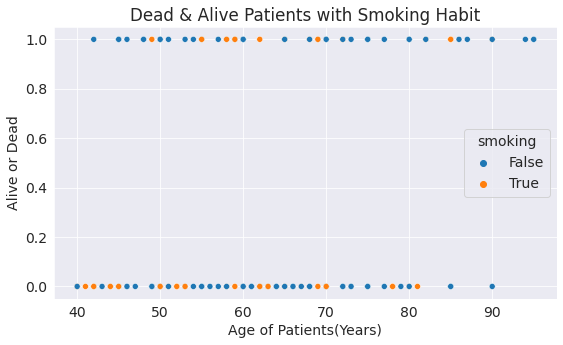

In [120]:
plt.title('Dead & Alive Patients with Smoking Habit')
plt.xlabel('Age of Patients(Years)')
plt.ylabel('Alive or Dead')
sns.scatterplot(x = 'age', y = 'patient_dead', hue = 'smoking', data = heart_failure_df);

From the above result, we can conclude that the number of patients with smoking habit died during follow-up period is less when compared to alive patients with smoking habit. It indicates that smoking habit has very less impact on the life of a heart failure patient.

Totally 30 smokers died during the follow-up period, let's check the records of individual patients to analyze.

In [121]:
heart_failure_df [(heart_failure_df.patient_dead == True) & (heart_failure_df.smoking == True )]

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead,age_group,abnormal_ef,abnormal_platelets,abnormal_creatinine,abnormal_sodium
2,65,False,False,20,False,162,1.30,129,Male,True,True,65-70,Abormal,Normal,Abnormal,Abnormal
5,90,True,False,40,True,204,2.10,132,Male,True,True,90-95,Abormal,Normal,Abnormal,Abnormal
7,60,True,True,60,False,454,1.10,131,Male,True,True,60-65,Normal,Abnormal,Normal,Abnormal
9,80,True,False,35,True,388,9.40,133,Male,True,True,80-85,Abormal,Normal,Abnormal,Abnormal
10,75,True,False,38,True,368,4.00,131,Male,True,True,75-80,Abormal,Normal,Abnormal,Abnormal
11,62,False,False,25,True,253,0.90,140,Male,True,True,60-65,Abormal,Normal,Normal,Normal
22,68,True,False,35,True,289,0.90,140,Male,True,True,65-70,Abormal,Normal,Normal,Normal
25,80,False,True,38,False,149,1.90,144,Male,True,True,80-85,Abormal,Abnormal,Abnormal,Normal
27,70,False,True,45,True,284,1.30,136,Male,True,True,70-75,Abormal,Normal,Abnormal,Normal
29,82,False,True,30,False,200,1.20,132,Male,True,True,80-85,Abormal,Normal,Normal,Abnormal


In [122]:
heart_failure_df [(heart_failure_df.patient_dead == True) & 
                  (heart_failure_df.smoking == True ) & (heart_failure_df.abnormal_ef == 'Normal')].shape 

(2, 16)

In [123]:
heart_failure_df [(heart_failure_df.patient_dead == True) & 
                  (heart_failure_df.smoking == True ) & (heart_failure_df.abnormal_creatinine == 'Normal')].shape

(16, 16)

Since, we already know that the most common factor among the heart failure patients was Ejection Fraction followed by abnormal creatinine level in the blood. 2 Patients with smoking habit died, though they had Normal Ejection Fraction and 16 Patients died with smoking habit, though they had Normal Creatinine Level in the blood.

So, we can conclude that the smoking habit surely has little impact on the life of a heart failure patient.

## Inferences and Conclusions
We've drawn many inferences from the survey. Here's a summary of a few of them:

1. Based on the recorded patients gender, we can infer that the dataset is slightly imbalanced, since only 35.1% of Patients were Female.

2. We have more number of patients under 60-65 age group and the next place goes to 50-55 age group. And the number of patients recorded starts declining from 65-70 age group, it's obvious since the life expectancy of a person in Pakistan in 2015 was approximately 67 years.

3. 32.1% of patients died during the follow-up period. This might be because the data mentioned in our data frame corresponds to only the certain period of time (April'15 - December'15) and more number of patients might have died after this period (which isn't recorded).

4. Maximum patients died (during the follow-up period is) under 60-65 age group (i.e 15 Patients). It's obvious, since we have more number of patients in 60-65 age group. And the proportion of patients died starts increasing from 65-70 age group and the number of patients died is more than alive patients in the age group of 80-85, 85-90 and 90-95. This is because over the time, the body’s immune system naturally becomes less capable of handling new threats, such as viruses including novel corona virus. This increases the risk of having issues with various illnesses which ultimately leads to their end.

5. The proportion of male and female patients died during the follow-up period is almost equal (i.e ~32%).

6. The abnormality in Ejection Fraction(EF) is the most common factor among the heart failure patients. Abnormal Ejection Fraction is followed by the abnormal creatinine and sodium level in the blood respectively, the factor which is least common among the heart failure patients is abnormal Platelets Count (i.e only 47 Patients).

7. No medical record values have been normally distributed. Platelets count, Ejection Fraction and Creatinine Level are right skewed and Sodium Level is left skewed.

8. The most common abnormality or disease among the heart failure patients is Ejection Fraction and 261 Patients had abnormal Ejection Fraction.

9. The least common abnormality or disease among the heart failure patients is Abnormal Platelets Count and 47 Patients had abnormal Platelets Count.
Though they had normal ejection fraction and normal creatinine level in the blood, some patients with smoking habit died. So, we can conclude that the smoking habit has little impact on the life expectancy of a heart failure patient.

## References and Future work

Check out the following resources to learn more about the dataset, attributes and tools used in this notebook:


1.   Heart Failure Clinical Records Dataset in Kaggle: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.   Advanced study in Heart Failure Patients Dataset: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5
3. Attributes Information Table: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1
4. Ejection Fraction: https://my.clevelandclinic.org/health/articles/16950-ejection-fraction
5. Platelets: https://www.ucsfhealth.org/medical-tests/platelet-count
6. Serum Creatinine: https://www.medicinenet.com/creatinine_blood_test/article.html
7. Serum Sodium: https://www.healthcheckup.com/general/normal-sodium-levels-in-blood/
8. Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
9. Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
10. Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
11. opendatasets Python library: https://github.com/JovianML/opendatasets
12. Data Visualization in Python: https://medium.com/@siddhardhan23/data-visualization-in-python-a90ddb706b23


**Future Work**
There are a lot of improvements we can make to our project in the future with the help of necessary tools and datasets. Here are some of the things we could do in enhancing our project:

1. Analyze what is the most common factor among heart failure patients to confirm our findings, using data gathered from all over the world on heart failure patients
2. Determine the number of patients who died based on their abnormality and disease. For example: Number of Patients who died with Anaemia and Diabetes, Number of Patients who died with Abnormal Ejection Fraction, High Blood Pressure, and Abnormal Creatinine Level.
3. Study further about the clinical records like 'Ejection Fraction' and 'Creatinine Level' and how they are interrelated.
4. Predict the life expectancy of heart failure patients through machine learning models.